# QEMC Algorithm - a Closer Look on Random Graphs and Scaling of Requried Ansatz Execution Shots for the $(B, N - B)$-MaxCut Problem

**Ohad Lev**

**October 2023**

We have already figured out, that for $d$-regular graphs, when $d$ is small and $B$ is small ($B$ = the number of "blue" nodes) - solutions for the $(B, N - B)$-MaxCut problem are easy to find. Pick $B$ nodes randomly - and a high-valued cut will be obtained with high probability.

As our effort of looking for advantage in memory using QEMC pursues, we first need to alleviate this obstacle. Our direction of research is focused on the *Online $(B, N - B)$-MaxCut* problem when $B << N$, so careful is needed when choosing graph instances to focus on. In this report, however, we are not dealing with the *Online* part of the problem stated above, but rather we focus on probing after suitable graph instances for the problem setting we depicted, and the scaling of the $S$ shots parameter.

As a first step, we now create a graph instance which we name $G_1$. $G_1$ is an Erdős–Rényi connected graph, with the probability of existence of each edge defined as $p = 0.5$. It comprises of $N = |V| = 16$ nodes:

G1:
Connected? True
|E| = 66


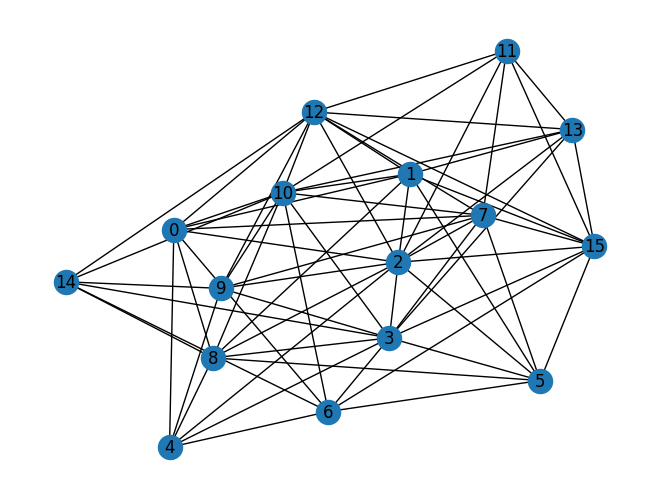

In [3]:
import networkx as nx

NUM_NODES = 16
P = 0.5

g_1 = nx.erdos_renyi_graph(NUM_NODES, P)

print("G1:")
nx.draw(g_1, with_labels=True)
print(f"Connected? {nx.is_connected(g_1)}")
print(f"|E| = {g_1.number_of_edges()}")

We now set $B = 3$ and solve the $(B, N - B)$-MaxCut problem with respect to $G_1$ by exhaustive search. specifically, we are intersted to see the density of high-valued cuts compared to low-valued cuts. If only a few cuts are high-valued, it is a good sign, and probably it won't be easy to approach this problem by employing a simple randomized approach. So:

G1'S MaxCut = 30

Distribution = {1.0: 2, 0.967: 2, 0.933: 4, 0.9: 12, 0.867: 20, 0.833: 30, 0.8: 45, 0.767: 58, 0.733: 90, 0.7: 99, 0.667: 68, 0.633: 57, 0.6: 44, 0.567: 19, 0.533: 7, 0.5: 3}

Mean approximation ratio = 0.7149875



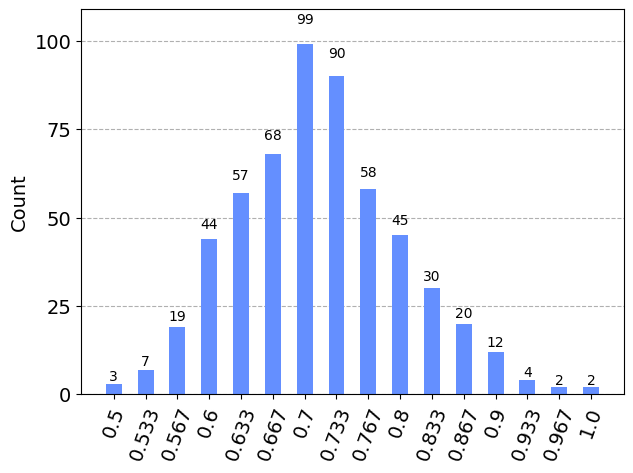

In [4]:
from qiskit.visualization import plot_histogram
from online_qemc.classical_solvers import get_cuts_approx_ratios_distribution

B = 3

cuts_approx_ratios_analysis = get_cuts_approx_ratios_distribution(g_1, B)
approx_ratios_dist = cuts_approx_ratios_analysis["distribution"]
maxcut = cuts_approx_ratios_analysis["maxcut"]
mean_approx_ratio = cuts_approx_ratios_analysis["mean_approx_ratio"]

print(f"G1'S MaxCut = {maxcut}")
print()
print(f"Distribution = {approx_ratios_dist}")
print()
print(f"Mean approximation ratio = {mean_approx_ratio}")
print()

plot_histogram(approx_ratios_dist)

Great. We get a sort of normal distribution, with only a few partitions achieves high approximation ratios, and most of the cuts are concentrated around approximation ratios of $\approx 70\%$.

For the sake of comparison, we now plot the histogram of approximation ratios for a $3$-regular random graph, with $N = 16$ and $B = 3$:

G1'S MaxCut = 9

Distribution = {1.0: 270, 0.778: 246, 0.556: 42, 0.333: 2}

Mean approximation ratio = 0.8667964285714286



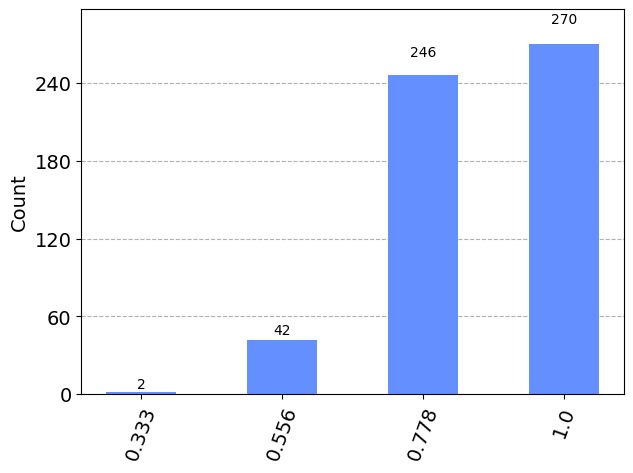

In [7]:
reg_graph = nx.random_regular_graph(d=3, n=NUM_NODES)

cuts_approx_ratios_analysis = get_cuts_approx_ratios_distribution(reg_graph, B)
approx_ratios_dist = cuts_approx_ratios_analysis["distribution"]
maxcut = cuts_approx_ratios_analysis["maxcut"]
mean_approx_ratio = cuts_approx_ratios_analysis["mean_approx_ratio"]

print(f"G1'S MaxCut = {maxcut}")
print()
print(f"Distribution = {approx_ratios_dist}")
print()
print(f"Mean approximation ratio = {mean_approx_ratio}")
print()

plot_histogram(approx_ratios_dist)

Indeed, it is very likely to obtain the MaxCut by random guesses of partitions, in the case of the $3$-regular, $N = 16$, $B = 3$ instance.

## Examining the Scaling of Required Shots $S$

We now set the stage to perform numerical (noiseless) simulations of the QEMC algorithm for $G_1$ and $B = 3$.

We use the COBYLA optimizer and set the maximum number of optimizer-iterations as `max_iter=1000`, so the optimizer runs until convergence or it halts at the maximum number of iterations. We set the number of layers in the Ansatz circuit as $L = 5$, and use the same Ansatz circuit as in the QEMC paper. E.g. for $N = 16$ we set $L = 5$ and the Ansatz is:

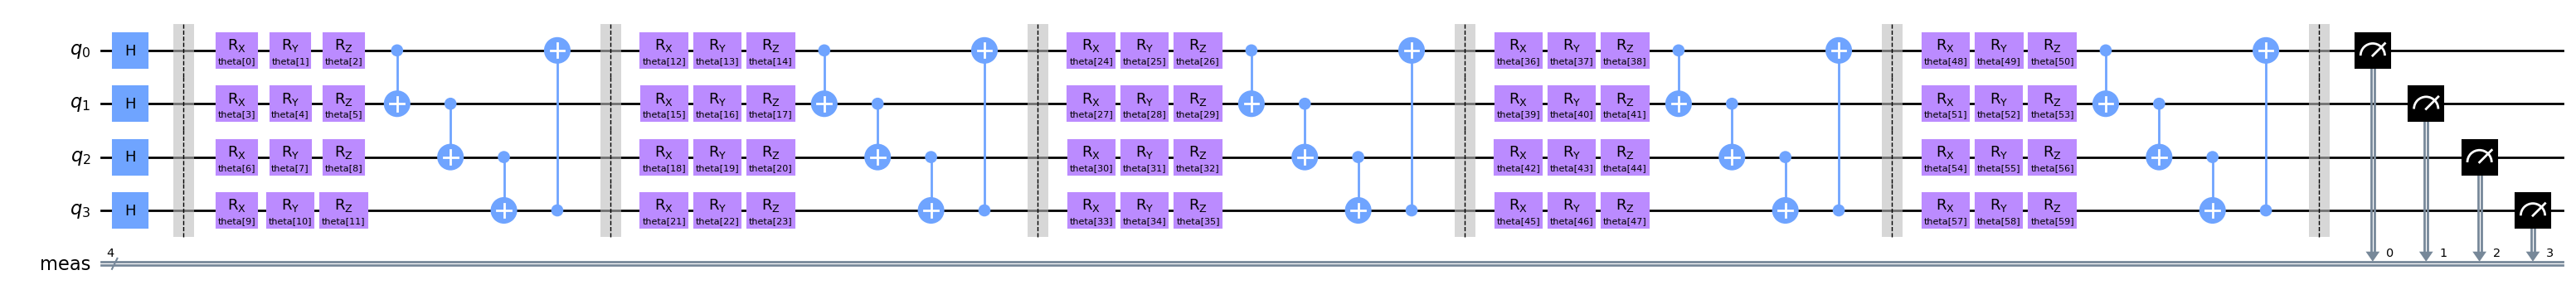

In this notebook, we set the number of shots as $S = B = 3$. In future analysis we will examine multiple values of $S$ using a benchmarkimg framework that I will build.

The maximum cut of $G_1$ is $30$, as found by exhaustive search earlier.

Therfore:

In [35]:
from qemc_implementation import QEMC

L = 5

qemc_solver = QEMC(graph=g_1, num_blue_nodes=B, force_blue_nodes=True)
qemc_solver.construct_ansatz(num_layers=L)
qemc_solver.run(shots=3)

QEMCResult(optimizer_result= message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 10.222222222222216
       x: [ 3.055e+00  5.194e+00 ...  4.397e+00  5.956e+00]
    nfev: 450
   maxcv: 0.0, best_counts={'1100': 1, '1010': 1, '0010': 1}, best_params=array([3.05494667, 5.19395323, 0.41035347, 1.18891668, 1.05135583,
       3.72067216, 1.18214573, 2.24885345, 5.69061703, 1.61736017,
       2.52287494, 5.48282983, 4.65709188, 6.12691944, 4.2980964 ,
       1.7562976 , 0.18600507, 0.03580221, 6.01199503, 4.30109377,
       1.74453861, 2.25040262, 2.22471248, 2.27870858, 5.75804968,
       7.28033192, 0.39069662, 2.72595338, 1.56871238, 2.48924738,
       1.8684543 , 4.63389651, 2.33292255, 4.76339501, 3.67044664,
       0.82050733, 3.05472467, 5.8922297 , 4.92291457, 1.48105688,
       5.37095106, 3.96223441, 3.01277087, 1.718696  , 3.02220273,
       4.15378685, 0.79463563, 4.34756761, 2.95080598, 1.63820236,
       1.5008878 , 6.07400804, 2.70463917, 1.74262

Great. An approximation ratio of $\frac{29}{30} = 96.66\%$ has been achieved.

## Expanding to graphs with $N = 32, 64, 128$ Nodes

Graph $G_2$ is an Erdos-Renyi graph with $N = 32$ nodes and $p = 0.25$:

G2:
Connected? True
|E| = 122


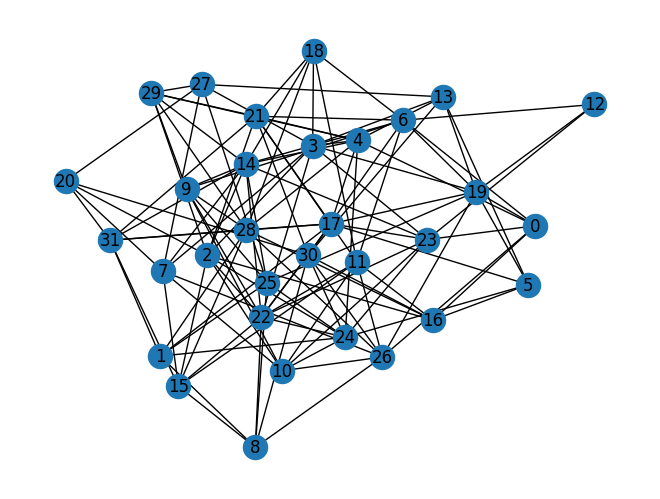

In [41]:
G_2_NUM_NODES = 32
P = 0.25

g_2 = nx.erdos_renyi_graph(G_2_NUM_NODES, P)

print("G2:")
nx.draw(g_2, with_labels=True)
print(f"Connected? {nx.is_connected(g_2)}")
print(f"|E| = {g_2.number_of_edges()}")

G2's MaxCut = 31

Distribution = {1.0: 1, 0.968: 13, 0.935: 28, 0.903: 60, 0.871: 125, 0.839: 224, 0.806: 337, 0.774: 479, 0.742: 557, 0.71: 616, 0.677: 604, 0.645: 567, 0.613: 479, 0.581: 339, 0.548: 226, 0.516: 171, 0.484: 84, 0.452: 33, 0.419: 13, 0.387: 4}

Mean approximation ratio = 0.6902493951612902



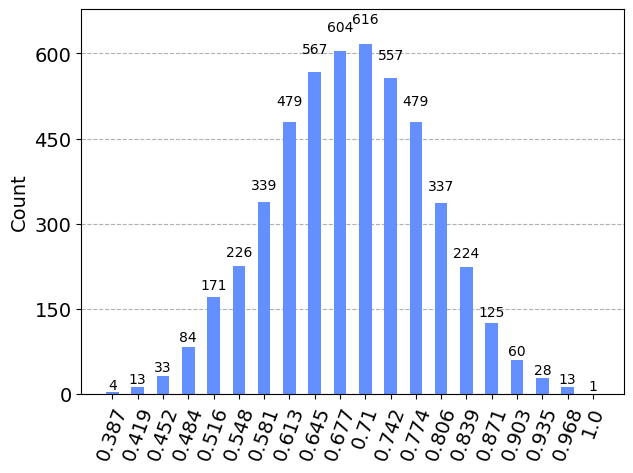

In [42]:
cuts_approx_ratios_analysis = get_cuts_approx_ratios_distribution(g_2, B)
approx_ratios_dist = cuts_approx_ratios_analysis["distribution"]
maxcut = cuts_approx_ratios_analysis["maxcut"]
mean_approx_ratio = cuts_approx_ratios_analysis["mean_approx_ratio"]

print(f"G2's MaxCut = {maxcut}")
print()
print(f"Distribution = {approx_ratios_dist}")
print()
print(f"Mean approximation ratio = {mean_approx_ratio}")
print()

plot_histogram(approx_ratios_dist)

In [44]:
qemc_solver = QEMC(graph=g_2, num_blue_nodes=B, force_blue_nodes=True)
qemc_solver.construct_ansatz(num_layers=L)
qemc_solver.run(shots=3)

QEMCResult(optimizer_result= message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 22.88888888888884
       x: [ 1.250e+00  2.908e+00 ...  7.071e-03  6.113e+00]
    nfev: 527
   maxcv: 0.0, best_counts={'11110': 1, '01110': 1, '10011': 1}, best_params=array([1.25004256, 2.90841615, 3.9558745 , 1.14656525, 2.76473422,
       2.04615884, 1.51078326, 1.48117302, 1.69318578, 1.36022395,
       1.07395679, 1.10278349, 4.0777021 , 5.30499821, 5.5057103 ,
       4.16315209, 3.65002028, 1.92691561, 5.64828089, 5.48518238,
       0.33353698, 4.30993875, 6.17739399, 2.19544024, 3.13647251,
       0.08890088, 2.38270134, 1.87905261, 4.80781953, 2.63570325,
       1.02566675, 5.04410092, 3.80374149, 5.26882855, 0.53617316,
       1.20287917, 4.11351679, 5.30019566, 5.27874849, 2.42644895,
       5.88998671, 3.79433708, 2.22814272, 3.32863958, 0.54423878,
       1.05020291, 5.40926912, 3.58644689, 5.31629808, 1.60313098,
       4.3383089 , 3.69253948, 3.82604328, 2.191

Great. An approximation ratio of $\frac{30}{31} = 96.77\%$ has been achieved.

-------------

Graph $G_3$ is an Erdos-Renyi graph with $N = 64$ nodes and $p = 0.2$:

G3:
Connected? True
|E| = 412


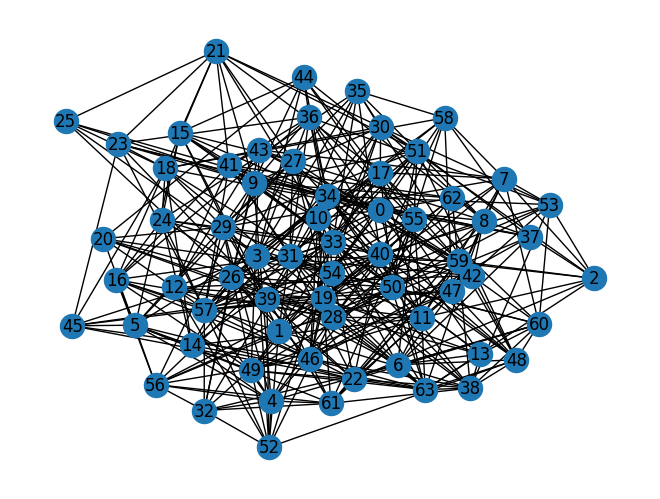

In [48]:
G_3_NUM_NODES = 64
P = 0.2

g_3 = nx.erdos_renyi_graph(G_3_NUM_NODES, P)

print("G3:")
nx.draw(g_3, with_labels=True)
print(f"Connected? {nx.is_connected(g_3)}")
print(f"|E| = {g_3.number_of_edges()}")

G2's MaxCut = 56

Distribution = {1.0: 8, 0.982: 20, 0.964: 41, 0.946: 52, 0.929: 110, 0.911: 192, 0.893: 264, 0.875: 366, 0.857: 531, 0.839: 710, 0.821: 902, 0.804: 1163, 0.786: 1432, 0.768: 1696, 0.75: 1980, 0.732: 2349, 0.714: 2584, 0.696: 2719, 0.679: 2777, 0.661: 2979, 0.643: 2917, 0.625: 2824, 0.607: 2614, 0.589: 2384, 0.571: 2108, 0.554: 1702, 0.536: 1348, 0.518: 1055, 0.5: 730, 0.482: 479, 0.464: 294, 0.446: 181, 0.429: 92, 0.411: 40, 0.393: 16, 0.375: 5}

Mean approximation ratio = 0.6678343653993857



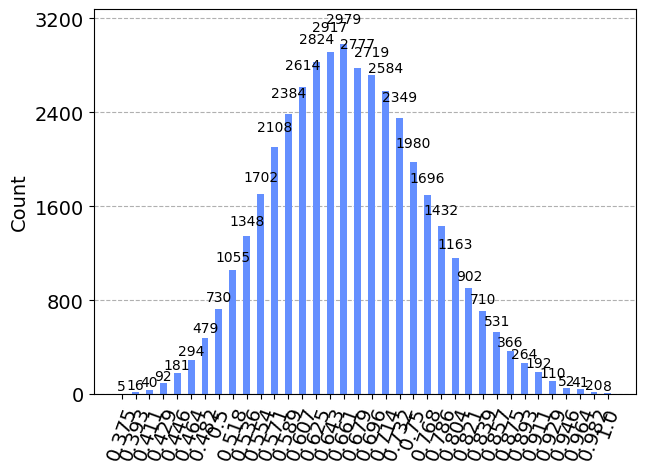

In [49]:
cuts_approx_ratios_analysis = get_cuts_approx_ratios_distribution(g_3, B)
approx_ratios_dist = cuts_approx_ratios_analysis["distribution"]
maxcut = cuts_approx_ratios_analysis["maxcut"]
mean_approx_ratio = cuts_approx_ratios_analysis["mean_approx_ratio"]

print(f"G2's MaxCut = {maxcut}")
print()
print(f"Distribution = {approx_ratios_dist}")
print()
print(f"Mean approximation ratio = {mean_approx_ratio}")
print()

plot_histogram(approx_ratios_dist)

In [50]:
qemc_solver = QEMC(graph=g_3, num_blue_nodes=B, force_blue_nodes=True)
qemc_solver.construct_ansatz(num_layers=L)
qemc_solver.run(shots=3)

QEMCResult(optimizer_result= message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 83.33333333333368
       x: [ 5.210e+00  4.567e+00 ...  2.660e+00  1.958e+00]
    nfev: 677
   maxcv: 0.0, best_counts={'111111': 1, '011111': 1, '110010': 1}, best_params=array([5.21001993, 4.56706483, 2.40603079, 0.15164092, 3.46325268,
       5.20744089, 3.58799799, 4.11353214, 1.54685905, 5.33622962,
       5.70592174, 5.5006905 , 0.91632211, 3.69292018, 3.92175962,
       0.06592005, 1.56330285, 2.05944341, 2.88480765, 3.92704125,
       4.97460688, 4.85114505, 3.98097   , 5.31267058, 4.2526091 ,
       2.47342024, 5.86640843, 4.73565904, 0.5017467 , 3.55549157,
       5.0171712 , 2.28634582, 5.41810853, 4.25435804, 5.73612736,
       3.80150925, 2.37817419, 4.16995377, 0.95177116, 1.67656435,
       1.60418772, 1.08882315, 3.7154818 , 1.91711991, 0.48701333,
       0.59258181, 2.52922924, 0.40724539, 2.07080704, 2.91814997,
       3.29359204, 4.79336513, 3.53891007, 2.

Great. An approximation ratio of $\frac{53}{56} = 94.64\%$ has been achieved.

----------------------------

Graph $G_4$ is an Erdos-Renyi graph with $N = 128$ nodes and $p = 0.1$:

G4:
Connected? True
|E| = 774


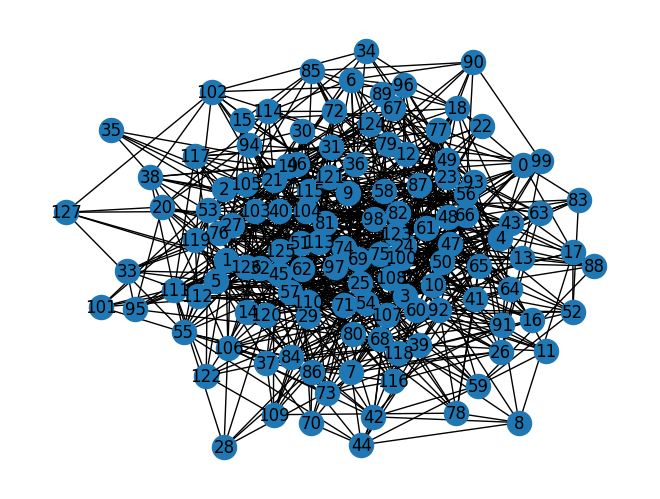

In [52]:
G_4_NUM_NODES = 128
P = 0.1

g_4 = nx.erdos_renyi_graph(G_4_NUM_NODES, P)

print("G4:")
nx.draw(g_4, with_labels=True)
print(f"Connected? {nx.is_connected(g_4)}")
print(f"|E| = {g_4.number_of_edges()}")

G2's MaxCut = 57

Distribution = {1.0: 7, 0.982: 11, 0.965: 52, 0.947: 93, 0.93: 188, 0.912: 377, 0.895: 594, 0.877: 1002, 0.86: 1608, 0.842: 2380, 0.825: 3434, 0.807: 4637, 0.789: 6480, 0.772: 8381, 0.754: 10498, 0.737: 12786, 0.719: 15277, 0.702: 17807, 0.684: 20060, 0.667: 21461, 0.649: 22881, 0.632: 23924, 0.614: 23860, 0.596: 22783, 0.579: 21630, 0.561: 20066, 0.544: 17719, 0.526: 14783, 0.509: 12397, 0.491: 10320, 0.474: 7691, 0.456: 5580, 0.439: 4033, 0.421: 2821, 0.404: 1721, 0.386: 1027, 0.368: 541, 0.351: 284, 0.333: 133, 0.316: 43, 0.298: 6}

Mean approximation ratio = 0.6264605391122985



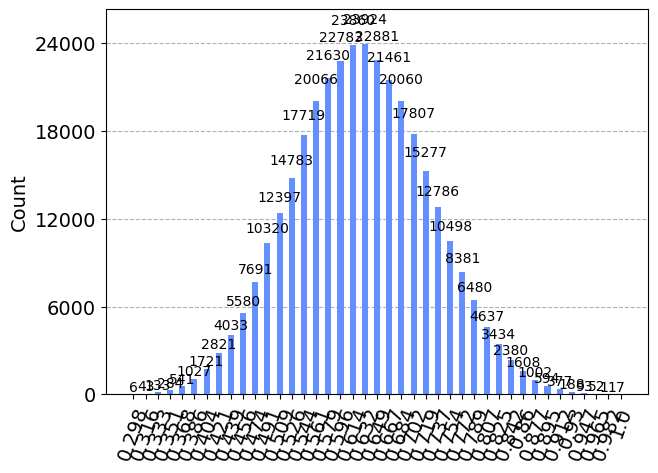

In [53]:
cuts_approx_ratios_analysis = get_cuts_approx_ratios_distribution(g_4, B)
approx_ratios_dist = cuts_approx_ratios_analysis["distribution"]
maxcut = cuts_approx_ratios_analysis["maxcut"]
mean_approx_ratio = cuts_approx_ratios_analysis["mean_approx_ratio"]

print(f"G4's MaxCut = {maxcut}")
print()
print(f"Distribution = {approx_ratios_dist}")
print()
print(f"Mean approximation ratio = {mean_approx_ratio}")
print()

plot_histogram(approx_ratios_dist)

In [54]:
qemc_solver = QEMC(graph=g_4, num_blue_nodes=B, force_blue_nodes=True)
qemc_solver.construct_ansatz(num_layers=L)
qemc_solver.run(shots=3)

QEMCResult(optimizer_result= message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 165.33333333333601
       x: [ 4.627e+00  4.342e-01 ...  2.981e+00  3.295e+00]
    nfev: 807
   maxcv: 0.0, best_counts={'0101111': 1, '0001001': 1, '1000101': 1}, best_params=array([ 4.62706126e+00,  4.34198812e-01,  6.10610006e+00,  2.23471743e+00,
        3.93491353e+00,  7.89540339e-02,  7.50981776e-01,  5.57724475e-01,
        1.64953525e+00,  5.62808430e+00,  5.07439551e+00,  3.73669509e+00,
        5.17435825e+00,  3.41024661e+00,  3.35483551e+00,  5.59377375e+00,
        3.94603883e+00,  7.57037047e-01, -7.08294068e-04,  4.97550720e-01,
        3.24788688e+00,  2.90451852e+00,  4.03394008e+00,  5.19783983e+00,
        1.87248817e+00,  3.73159128e+00,  2.29114399e+00,  3.87380872e+00,
        4.45972267e+00,  2.89990680e+00,  2.67760451e-01,  1.41056885e+00,
        2.48578615e+00,  1.53523110e+00,  3.42708612e+00,  2.02329334e+00,
        2.25040793e+00,  2.04181946e

Great. An approximation ratio of $\frac{55}{57} = 96.49\%$ has been achieved.

In [58]:
0.999 ** 807

0.44601452099741595

In [63]:
import sympy as sp

float((1 - (70 / sp.binomial(128, 3))) ** 807)

0.847474668120805